# Group Member: Yujie Yi, Wendi Liu, Coco Li, Mengxiao Li, Helina Cheng, Chang Yuan

In [44]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from math import *

os.chdir('/Users/yiyujie/Desktop/program/ML')

In [ ]:
import os
import re
import nltk
import gensim, spacy
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from collections import Counter
from nltk import ngrams
from matplotlib.ticker import FuncFormatter
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from pprint import pprint
from nltk.tokenize import word_tokenize #sent_tokenize,
from nltk.corpus import stopwords, PlaintextCorpusReader
from matplotlib.patches import Rectangle
import statsmodels.api as sm
import codecs
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, PlaintextCorpusReader
from nltk.probability import FreqDist
from collections import defaultdict

Go to https://www.sec.gov/edgar/searchedgar/companysearch.html. Download the 10‐K reports for
apple (ticker: AAPL) from 2000 to 2022. Save each annual report in its own text file with title format “AAPL_10_K_yyyy.txt”, where yyyy is the relevant year. Create a dedicated folder for these text files,
which then is the location of the Corpus for this exercise.
1. Create log annual total asset growth based on the AAPL total asset data given with the homework (Apple_Total_Assets.csv). Plot this data with year on the horizontal axis. Our goal is to forecast asset growth using 10‐K text data.

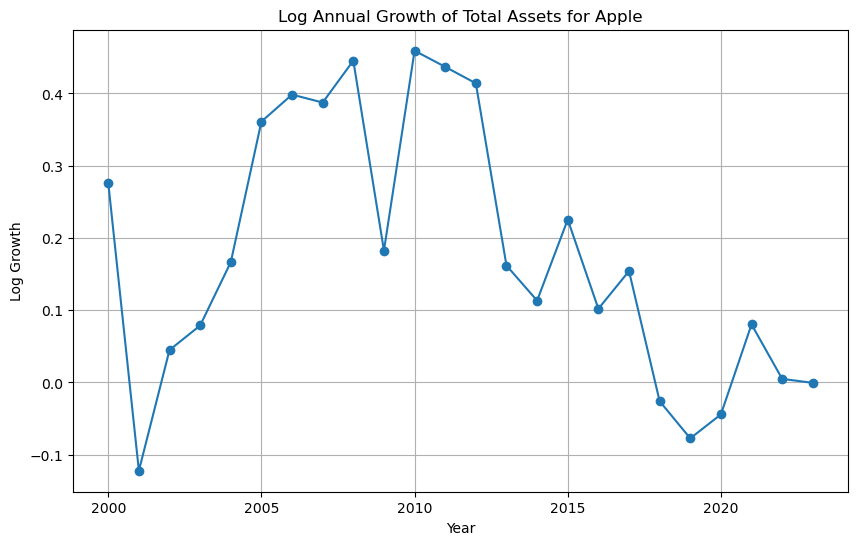

In [3]:
# Load the CSV file
data = pd.read_csv('Apple_Total_Assets.csv')

# Calculate log annual growth of total assets
data['log_growth'] = np.log(data['at'] / data['at'].shift(1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['fyear'], data['log_growth'], marker='o')
plt.title('Log Annual Growth of Total Assets for Apple')
plt.xlabel('Year')
plt.ylabel('Log Growth')
plt.grid(True)
plt.show()

2. Using the Corpus, clean the text data. In particular:
    * a. Only consider the text in the Business (Part I, Item 1) and the MD&A (Part II, Item 7) sections of each 10‐K.
    * b. Next, using if you want the code from last lecture,
        * i. get rid of stop words (you choose which ones to get rid of – you can use a library
        or define your own, or not get rid of any)
        * ii. get rid of numbers, and special characters (only keep letters)
        * iii. make all letters lower case
        * iv. perform stemming
    * c. save each cleaned file as “AAPL_10_K_yyyy_clean.txt)

In [111]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Set the directory path where the 10-K file is located
data_folder_path = os.path.join(os.getcwd(), 'Apple-10-K')
# Setting the output file path
output_file_path = os.path.join(os.getcwd(), 'Apple-10-K/cleaned')

# Setting up stop words and stemming extractors
stop_words = stopwords.words('english')
stop_words.extend(['u','ha','say','statement','compani','inc','form','includ'])
porter = PorterStemmer()

# Functions to clean up text
def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', text)  # get rid of numbers, and special characters
    tokens = word_tokenize(text.lower())  # make all letters lower case
    tokens = [token for token in tokens if token not in stop_words]  # get rid of stop words
    stemmed_tokens = [porter.stem(token) for token in tokens]  # perform stemming
    return ' '.join(stemmed_tokens)

# Open the output file in write mode
    
# Processing each file in a directory
for filename in os.listdir(data_folder_path):
    print(filename[:-4])
    if filename.endswith('.txt'):  # Ensure that text files are processed
        file_path = os.path.join(data_folder_path, filename)
        with open(file_path, 'r', encoding='iso-8859-1') as file:
            content = file.read()
            
            start = content.find('PART I')
            if start < 50000 and start!= -1:
                content = content[start:]
            else:
                content = content
            
            # Extract and clean up the "Business" section
            business_start_keywords = ['Item 1.', 'ITEM 1.']
            for keyword in business_start_keywords:
                business_start = content.find(keyword)
                if business_start != -1:
                    break
            if business_start == -1:
                business_start = re.search(r'Item\s*&nbsp;\s*1', content, re.IGNORECASE).start()
                print('abc')

            print(business_start)
            business_end_keywords = ['ITEM 2.', 'Item 2.']
            for keyword in business_end_keywords:
                business_end = content.find(keyword, business_start)
                if business_end != -1:
                    break
            
            business_text = content[business_start:business_end]
            cleaned_business = clean_text(business_text)
            
            with open(os.path.join(output_file_path, filename[:-4] + '_clean.txt'), 'w', encoding='iso-8859-1') as f:
                f.write(cleaned_business)
            
            # Extract and clean up the "MD&A" section
            mda_start_keywords = ['Item 7.', 'ITEM 7.']
            for keyword in mda_start_keywords:
                mda_start = content.find(keyword)
                if mda_start != -1:
                    break
            mda_end_keywords = ['ITEM 8.', 'Item 8.', 'Financial Statements and Supplementary Data']
            for keyword in mda_end_keywords:
                mda_end = content.find(keyword, mda_start)
                if mda_end != -1:
                    break
            
            mda_text = content[mda_start:mda_end]
            cleaned_mda = clean_text(mda_text)
            
            with open(os.path.join(output_file_path, filename[:-4]+'_clean.txt'), 'w', encoding='iso-8859-1') as f:
                f.write(cleaned_mda)
                    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yiyujie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yiyujie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AAPL_10_K_2010
abc
289
AAPL_10_K_2004
1194
AAPL_10_K_2005
14739
AAPL_10_K_2011
abc
289
AAPL_10_K_2007
958936
AAPL_10_K_2013
abc
315
AAPL_10_K_2012
abc
289
AAPL_10_K_2006
69745
AAPL_10_K_2002
699
AAPL_10_K_2016
34810
.DS_S
AAPL_10_K_2017
37821
AAPL_10_K_2003
1189
AAPL_10_K_2015
abc
290
AAPL_10_K_2001
910
AAPL_10_K_2000
758
AAPL_10_K_2014
abc
291
cle
AAPL_10_K_2019
261746
AAPL_10_K_2018
38314
AAPL_10_K_2022
194263
AAPL_10_K_2020
242736
AAPL_10_K_2008
abc
109
AAPL_10_K_2009
abc
289
AAPL_10_K_2021
193022


3. Create unigrams, bigrams, and trigrams. Plot the word frequency bar plots as in the lecture note. Do the most frequent words or phrases look useful for forecasting cash flows (gross profitability)?

2921117 i


<Axes: xlabel='frequency', ylabel='trigrams'>

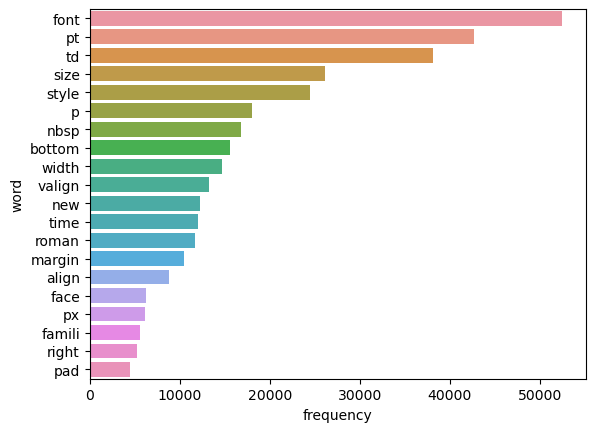

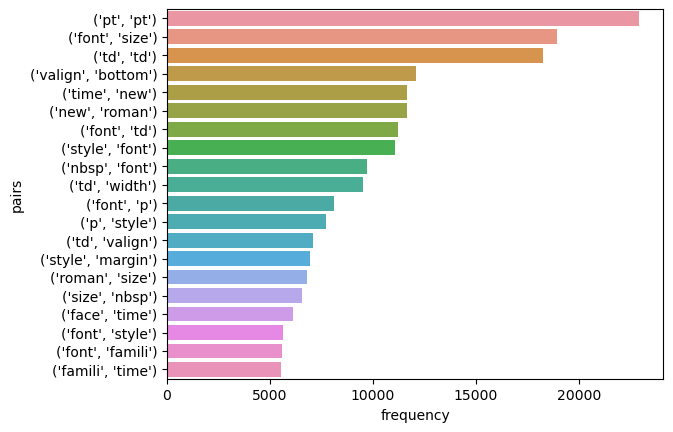

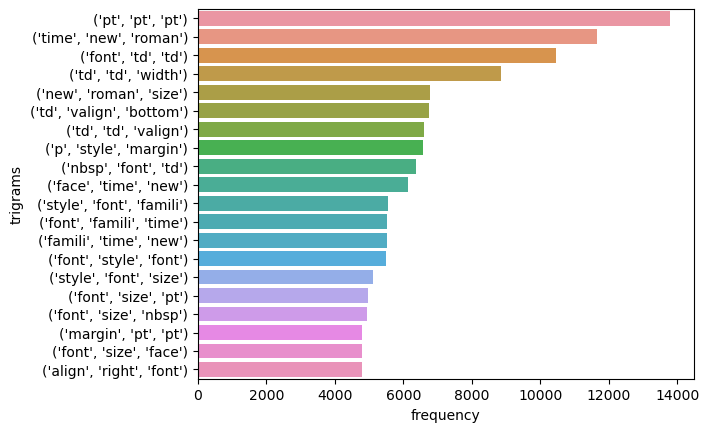

In [105]:
from nltk import ngrams

def read_files(directory):
    """Read each file in the directory and return contents."""
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return texts

# Function to preprocess and create word frequencies
def word_frequency(text, stopwords):
    # Tokenization and cleaning
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lower case
    tokens = [token for token in tokens if token not in stopwords and token.isalpha()]

    # Create unigrams, bigrams, trigrams
    unigrams = tokens
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))

    # Count the frequencies
    unigram_freq = Counter(unigrams)
    bigram_freq = Counter(bigrams)
    trigram_freq = Counter(trigrams)

    # Create data frames and sort by frequency
    unigram_df = pd.DataFrame(list(unigram_freq.items()), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    bigram_df = pd.DataFrame(list(bigram_freq.items()), columns=['pairs', 'frequency']).sort_values(by='frequency', ascending=False)
    trigram_df = pd.DataFrame(list(trigram_freq.items()), columns=['trigrams', 'frequency']).sort_values(by='frequency', ascending=False)

    return unigram_df, bigram_df, trigram_df

texts = read_files(output_file_path)
s = ''
for x in texts:
    s += x
texts = s

# Call the function
uni_df, bi_df, tri_df = word_frequency(texts, stop_words)

# Plotting the data
ax1 = plt.figure()
sns.barplot(x = 'frequency',y = 'word',data = uni_df.head(20))
ax2 = plt.figure()
sns.barplot(x = 'frequency',y = 'pairs',data = bi_df.head(20))
ax3 = plt.figure()
sns.barplot(x = 'frequency',y = 'trigrams',data = tri_df.head(20))


4. In class, we discussed how to make a custom sentiment index by regressing what you are trying
to predict onto the document term matrix. Unfortunately, we only have 30 years of data. So we
will create our own sentiment dictionaries. In particular, high growth words are assumed to be
['increas', 'effici', 'growth', 'innov', 'expans','develop', 'improv', 'success', 'invest'], while low growth words are assumed to be ['loss', 'risk', 'declin', 'litig', 'impair', 'volatil', 'default', 'obsolesc', 'challeng'].

    Create a document term matrix based on the unigrams. For each year, calculate the number of
    high growth words and low growth words using the above dictionaries. Create sentiment as the
    ratio of the number of times high growth words where used to the number of times low growth
    words were used. Plot this sentiment index against year.


In [106]:
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist

def dtm_from_corpus(xCorpus):
    fd_list = []
    for file_id in xCorpus.fileids():
        # Frequency distribution of words in each file
        fd_list.append(FreqDist(xCorpus.words(file_id)))

    # Create a DataFrame from the list of frequency distributions
    dtm = pd.DataFrame(fd_list, index=xCorpus.fileids())
    dtm.fillna(0, inplace=True)  # Replace NaN values with 0
    return dtm

# Directory where the cleaned text files are stored
cleaned_directory = output_file_path

# Create a plaintext corpus reader for the directory of cleaned text files
newcorpus = PlaintextCorpusReader(cleaned_directory, '.*.txt')

# Generate the document term matrix
dtm = dtm_from_corpus(newcorpus)

# Display the first few rows of the DTM
dtm.head()

,item,manag,discuss,analysi,financi,condit,result,oper,section,part,...,underlin,ief,ab,fcaa,ddbd,da,ffffff,icffec,efb,af
AAPL_10_K_2000_clean.txt,12,10,8,3,48,33,72,69,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL_10_K_2001_clean.txt,12,18,9,4,55,47,89,91,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL_10_K_2002_clean.txt,13,26,15,4,72,67,109,108,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL_10_K_2003_clean.txt,14,37,11,4,77,65,148,145,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL_10_K_2004_clean.txt,14,42,9,4,76,56,155,150,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


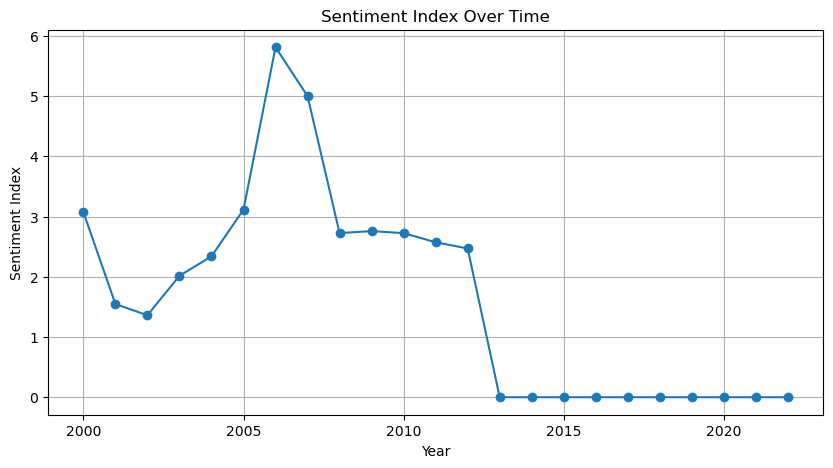

In [107]:
high_growth_words = ['increas', 'effici', 'growth', 'innov', 'expans','develop', 'improv', 'success', 'invest']
low_growth_words = ['loss', 'risk', 'declin', 'litig', 'impair', 'volatil', 'default', 'obsolesc', 'challeng']
# Sum the frequencies for high and low growth words
high_growth = dtm[high_growth_words].fillna(0).sum(1)
low_growth = dtm[low_growth_words].fillna(0).sum(1)
# Calculate the sentiment index, handling division by zero
sentiment_index = high_growth / low_growth.replace(0, 1)
dtm_sentiment.index = [int(file_id[10:14]) for file_id in dtm.index]  # Extracting year from file name format like 'file_YYYY-MM-DD.txt'

plt.figure(figsize=(10, 5))
plt.plot(dtm_sentiment.index, sentiment_index, marker='o', linestyle='-')
plt.title('Sentiment Index Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Index')
plt.grid(True)
plt.show()

5. Run a predictive OLS regression of next year’s log asset growth on the sentiment index. Report
the results. Also run a predictive OLS regression of next year’s asset growth on the sentiment index and this year’s asset growth and report the results. Does the text data add a marginally
significant predictive signal?

In [108]:
import statsmodels.api as sm

# create y and x data for regressions
data.set_index(data.fyear)
y_data = data['log_growth'][1:-1]
x_data = dtm_sentiment 
x_data.index = y_data.index

# run logit regression 
glm_binom = sm.GLM(y_data, sm.add_constant(x_data), family=sm.families.Binomial()) 
fitted = glm_binom.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             log_growth   No. Observations:                   23
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 12 May 2024   Deviance:                       562.34
Time:                        16:18:26   Pearson chi2:                 1.69e+16
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5945      1.244     -2.086      0.037      -5.032      -0.157
increas    -3.514e+14   1.48e+06  -2.38e+08      0.000   -3.51e+14   -3.51e+14
effici      3.047e+15   2.15e+07   1.42e+08      0.000    3.05e+15    3.05e+15
growth      1.212e+15   9.42e+06   1.29e+08      0.000    1.21e+15    1.21e+15
innov      -3.427e+14    1.8e+07  -1.91e+07      0.000   -3.43e+14   -3.43e+14
expans      3.956e+15   1.64e+07   2.41e+08      0.000    3.96e+15    3.96e+15
develop     7.906e+14   8.16e+06   9.69e+07      0.000    7.91e+14    7.91e+14
improv      3.275e+15   3.18e+07   1.03e+08      0.000    3.28e+15    3.28e+15
success    -3.121e+14   1.46e+07  -2.14e+07      0.000   -3.12e+14   -3.12e+14
invest      1.115e+14   6.06e+06   1.84e+07      0.000    1.11e+14    1.11e+14
loss       -2.731e+15   6.79e+06  -4.02e+08      0.000   -2.73e+15   -2.73e+15
risk        -1.05e+15   1.15e+07  -9.17e+07      0.000   -1.05e+15   -1.05e+15
declin     -6.651e+14   1.03e+07  -6.45e+07      0.000   -6.65e+14   -6.65e+14
litig      -1.862e+14   8.86e+06   -2.1e+07      0.000   -1.86e+14   -1.86e+14
impair      1.468e+15   8.27e+06   1.78e+08      0.000    1.47e+15    1.47e+15
volatil    -7.853e+14   1.46e+07  -5.37e+07      0.000   -7.85e+14   -7.85e+14
default     2.587e+15   1.31e+07   1.98e+08      0.000    2.59e+15    2.59e+15
obsolesc    3.576e+14   1.68e+06   2.12e+08      0.000    3.58e+14    3.58e+14
challeng   -2.465e+15   1.33e+07  -1.86e+08      0.000   -2.46e+15   -2.46e+15
==============================================================================
"""